## Final Project Submission

Please fill out:
* Student name: Ann Moraa
* Student pace: Part Time 
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:


# **Strategic Insights for Microsoft's New Movie Studio: A Comprehensive Data Analysis**


**Business Problem**

Microsoft is venturing into the movie industry with plans to establish a new movie studio. However, they lack experience in film production and need insights into what types of movies are currently successful at the box office. The challenge is to identify key factors that contribute to a movie's box office performance and provide actionable recommendations to guide Microsoft's new venture.


**Project Overview**

This project aims to leverage exploratory data analysis (EDA) to uncover trends and patterns in movie performance data. By analyzing datasets from various sources including IMDB and Box Office Mojo, we will gain insights into what makes a movie successful at the box office. The findings will be translated into strategic recommendations to help Microsoft decide the types of films they should produce.


**Objectives Of The study**

Analyze the Distribution of Movie Ratings and Earnings:

Explore Differences Between Movie Genres:

Investigate Correlations Between Movie Features and Success:

Analyze the impact of these new features on box office performance.

Generate three concrete business recommendations based on the analysis.

Present the findings in a clear and actionable manner suitable for non-technical stakeholders.

In [ ]:
# Importing the necessary libraries
import pandas as pd    
import numpy as np     
import seaborn as sns  
import matplotlib.pyplot as plt  

%matplotlib inline



In [ ]:
# import and read the first dataset(/content/bom.movie_gross.csv.gz)
df1 = pd.read_csv('/content/bom.movie_gross.csv.gz')

In [ ]:
# accessing information about ourfirst dataset
print(df1.shape)
print(df1.info())

(3387, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


In [ ]:
# displaying the first row of our first data set
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
# import and read the second  dataset(/content/imdb.title.basics.csv.gz)
df2 = pd.read_csv('/content/title.basics.csv')

In [ ]:
#accessing information about second dataset
print(df2.shape)
print(df2.info())

(51388, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51388 entries, 0 to 51387
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           51388 non-null  object 
 1   primary_title    51387 non-null  object 
 2   original_title   51386 non-null  object 
 3   start_year       51387 non-null  float64
 4   runtime_minutes  42816 non-null  float64
 5   genres           50036 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.4+ MB
None


In [ ]:
# displaying the first row of second dataset
df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy"


In [ ]:
# import and read the third dataset(/content/imdb.title.ratings.csv.gz)
df3 = pd.read_csv('/content/imdb.title.ratings.csv.gz')

In [ ]:
# accessing information about third dataset
print(df3.shape)
print(df3.info())

(73856, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


In [ ]:
# displaying the first row of second dataset
df3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


**Merging the Datasets**
Merging the datasets to facilitate efficient data cleaning and preparation, enabling a more holistic exploratory data analysis (EDA).

In [ ]:
# merging df2 and df3 based on their common column 'tconst
df2_and_df3 = pd.merge(df2, df3, on='tconst',how='inner')
df2_and_df3 .head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",6.5,119


In [ ]:
#renaming  the column'title' in df1 to match 'original_title' to enable easy merging
df1.rename(columns={'title':'original_title'}, inplace=True)
df1.head()

,original_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
#merging df2_and_df3 unto df1
imdb_data = pd.merge(df1, df2_and_df3, on='original_title', how='inner')
imdb_data.head()

,original_title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010.0,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010.0,124.0,"Action,Adventure,Sci-Fi",7.0,657690


**Data Cleaning**
Check and fill in missing values, remove duplicates, and align data formats, leading to a cleaner and more reliable dataset for analysis.

In [ ]:
# Checking for missing values
print("\nMissing values in each column:")
print(imdb_data.isnull().sum())



Missing values in each column:
original_title       0
studio               2
domestic_gross      15
foreign_gross      538
year                 0
tconst               0
primary_title        0
start_year           0
runtime_minutes     23
genres               2
averagerating        0
numvotes             0
dtype: int64


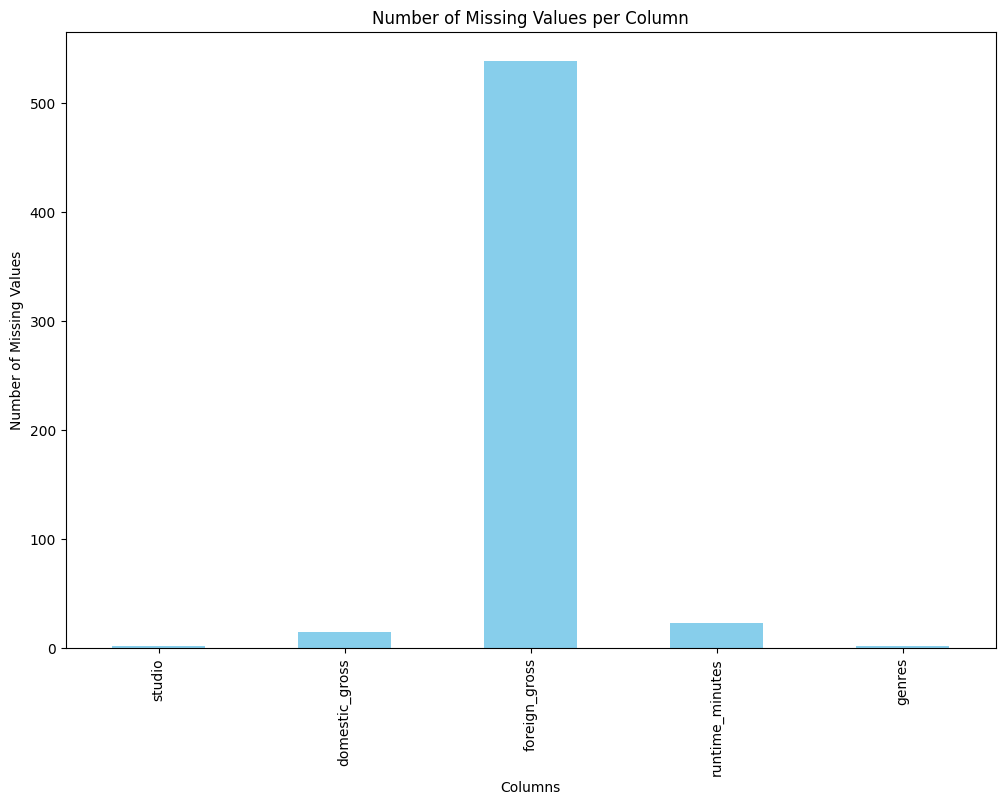

In [33]:
#Data visualization of missing values using Bargraph
# Bar plot of missing values per column
missing_values_count = imdb_data.isnull().sum()

plt.figure(figsize=(12, 8))
missing_values_count[missing_values_count > 0].plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()


In [48]:
# Filling missing values with the value 'unknown' columns with missing values
imdb_data_cleaned = imdb_data.fillna({
    'domestic_gross': 'unknown',
    'foreign_gross': 'unknown',
    'runtime_minutes': 'unknown',
    'genres': 'unknown',
    'studio': 'unknown'
})


In [50]:
#Checking for missing values in the cleaned dataset
print("\nMissing values in each column:")
print(imdb_data_cleaned.isnull().sum())


Missing values in each column:
original_title     0
studio             0
domestic_gross     0
foreign_gross      0
year               0
tconst             0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64


In [51]:
# Checking for duplicate rows and removing them to ensure each record is unique.
print("\nNumber of duplicate rows:", imdb_data.duplicated().sum())
imdb_data_cleaned = imdb_data.drop_duplicates()


Number of duplicate rows: 0


In [52]:
#checking and correcting datatypes
print("\nData types before conversion:")
print(imdb_data_cleaned.dtypes)


Data types before conversion:
original_title      object
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
tconst              object
primary_title       object
start_year         float64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object


In [53]:
# Getting information about the cleaned dataset
imdb_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   1661 non-null   object 
 1   studio           1659 non-null   object 
 2   domestic_gross   1646 non-null   float64
 3   foreign_gross    1123 non-null   object 
 4   year             1661 non-null   int64  
 5   tconst           1661 non-null   object 
 6   primary_title    1661 non-null   object 
 7   start_year       1661 non-null   float64
 8   runtime_minutes  1638 non-null   float64
 9   genres           1659 non-null   object 
 10  averagerating    1661 non-null   float64
 11  numvotes         1661 non-null   int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 155.8+ KB


**Descriptive Statistics**

Generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.

In [54]:
# Compute and display descriptive statistics
descriptive_stats = imdb_data_cleaned.describe()

# Display the descriptive statistics
print(descriptive_stats)


       domestic_gross         year   start_year  runtime_minutes  \
count    1.646000e+03  1661.000000  1661.000000      1638.000000   
mean     3.961084e+07  2013.090307  2012.641180       106.672772   
std      7.187488e+07     2.164118     2.065223        19.103336   
min      1.000000e+02  2010.000000  2010.000000        40.000000   
25%      3.552500e+05  2011.000000  2011.000000        94.000000   
50%      8.050000e+06  2013.000000  2012.000000       104.000000   
75%      4.732500e+07  2015.000000  2014.000000       117.000000   
max      7.001000e+08  2018.000000  2019.000000       186.000000   

       averagerating      numvotes  
count    1661.000000  1.661000e+03  
mean        6.388922  8.946543e+04  
std         0.992816  1.514221e+05  
min         1.600000  5.000000e+00  
25%         5.800000  7.073000e+03  
50%         6.400000  3.293500e+04  
75%         7.100000  1.005200e+05  
max         9.200000  1.841066e+06  


Data Visualization

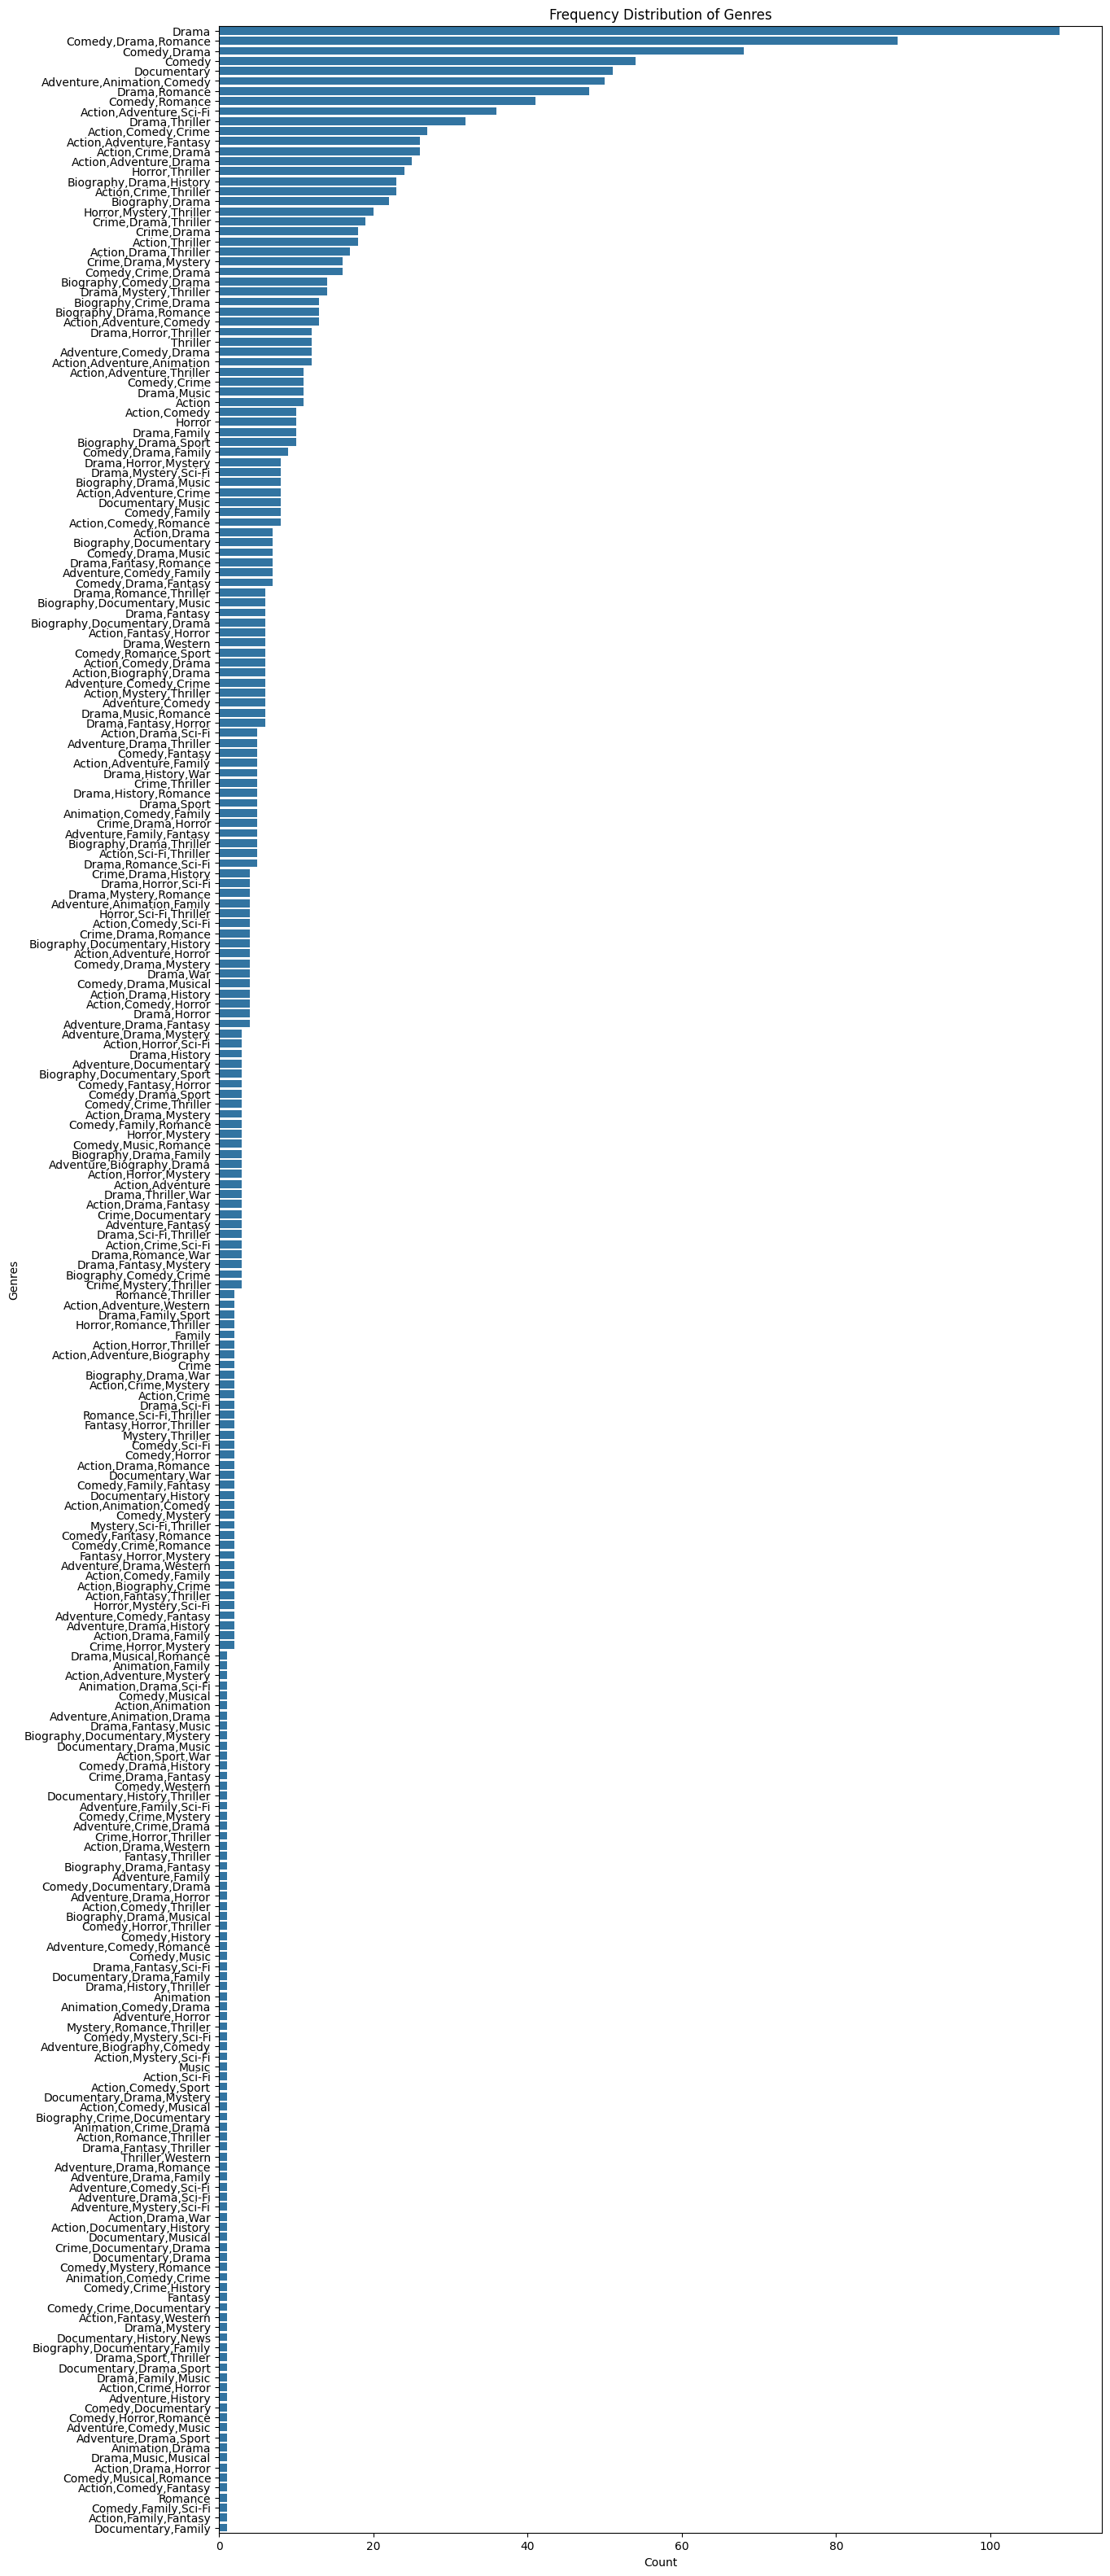

In [76]:
#Bar Chart: Frequency Distribution of Genres
plt.figure(figsize=(14, 40))
sns.countplot(y=imdb_data_cleaned['genres'].replace('unknown', np.nan).dropna(), order=imdb_data_cleaned['genres'].value_counts().index)
plt.title('Frequency Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()



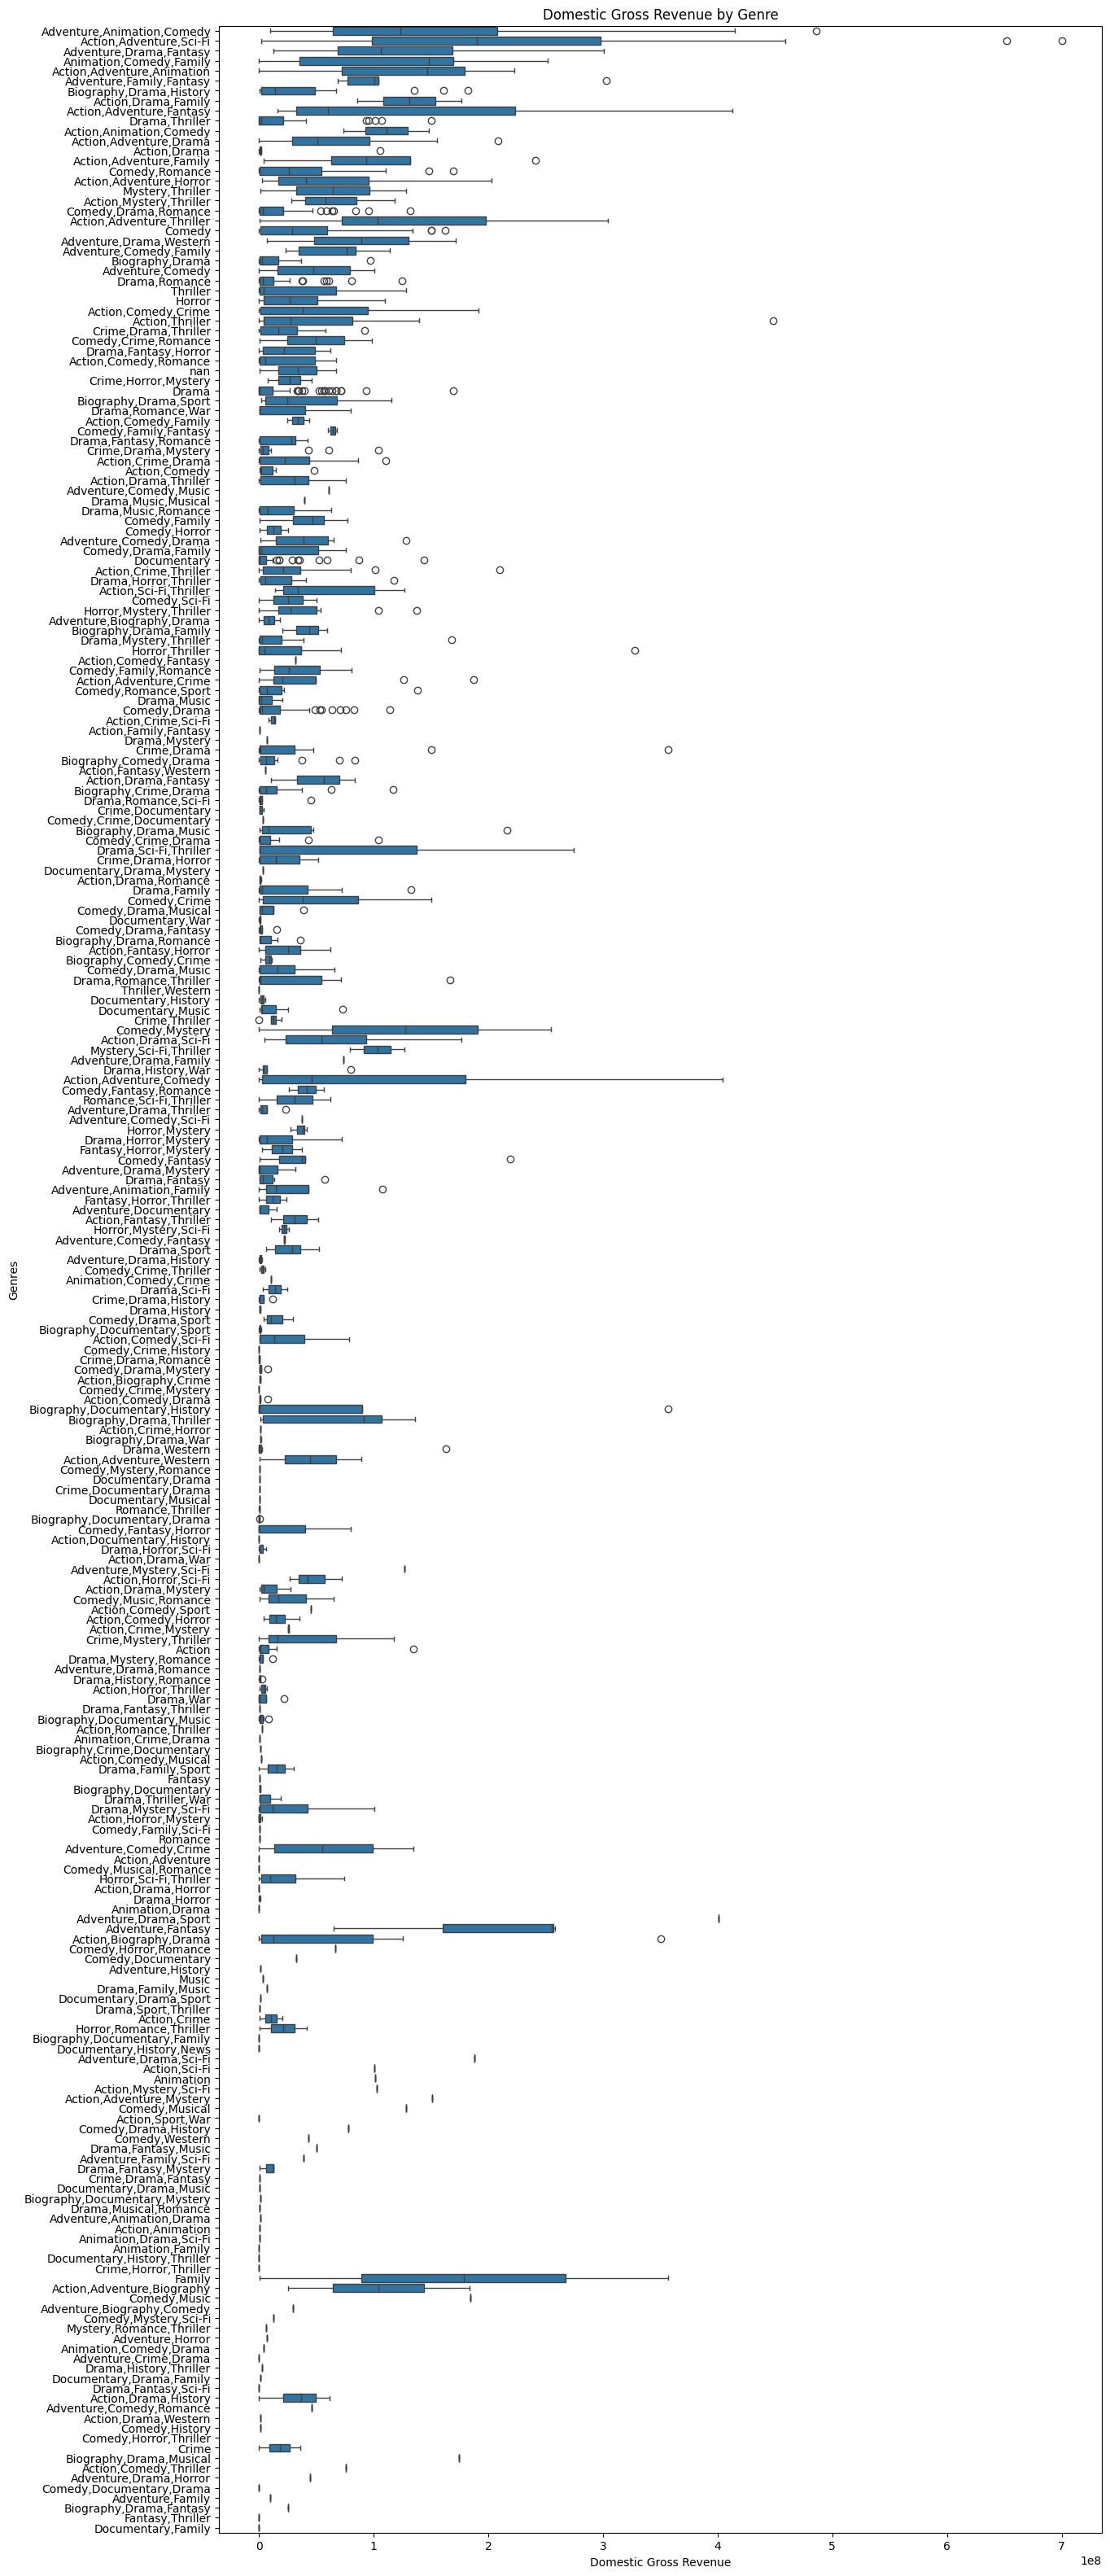

In [80]:
#Box Plot: Domestic Gross Revenue by Genre

imdb_data_cleaned['domestic_gross'] = imdb_data_cleaned['domestic_gross'].astype(str)
domestic_gross_clean = imdb_data_cleaned['domestic_gross'].replace('unknown', np.nan).dropna().str.replace(',', '').astype(float)

# Clean genres column
genres_clean = imdb_data_cleaned['genres'].astype(str).replace('unknown', np.nan).dropna()

# Create the boxplot
plt.figure(figsize=(14, 40))
sns.boxplot(x=domestic_gross_clean, y=genres_clean)
plt.title('Domestic Gross Revenue by Genre')
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Genres')
plt.show()




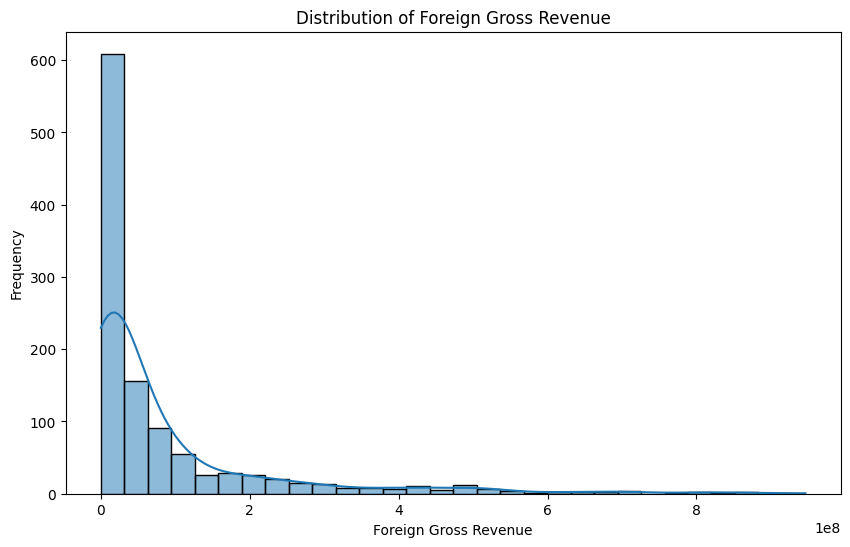

In [79]:
#Histogram: Distribution of Foreign Gross Revenue
# Clean and convert foreign_gross column
foreign_gross_clean = imdb_data_cleaned['foreign_gross'].replace('unknown', np.nan).dropna().str.replace(',', '').astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(foreign_gross_clean, bins=30, kde=True)
plt.title('Distribution of Foreign Gross Revenue')
plt.xlabel('Foreign Gross Revenue')
plt.ylabel('Frequency')
plt.show()


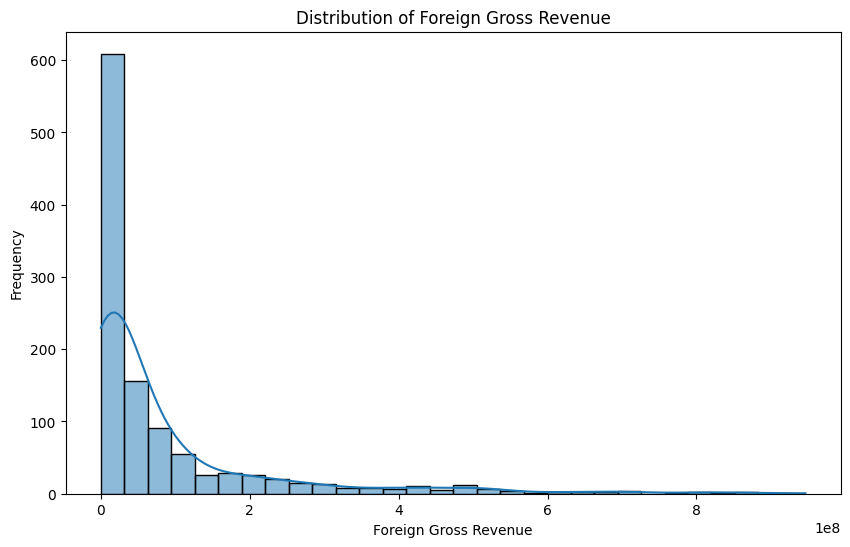

In [81]:
#Histogram: Distribution of Foreign Gross Revenue
# Clean and convert foreign_gross column
foreign_gross_clean = imdb_data_cleaned['foreign_gross'].replace('unknown', np.nan).dropna().str.replace(',', '').astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(foreign_gross_clean, bins=30, kde=True)
plt.title('Distribution of Foreign Gross Revenue')
plt.xlabel('Foreign Gross Revenue')
plt.ylabel('Frequency')
plt.show()


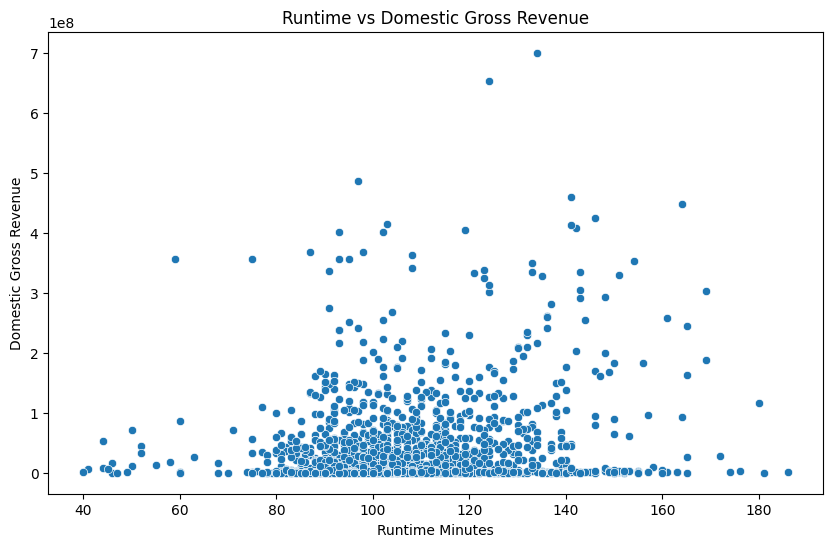

In [83]:
#Runtime Analysis
##Scatter Plot: Runtime vs Domestic Gross Revenue

# Convert runtime_minutes to string and clean data
imdb_data_cleaned['runtime_minutes'] = imdb_data_cleaned['runtime_minutes'].astype(str)
runtime_minutes_clean = imdb_data_cleaned['runtime_minutes'].replace('unknown', np.nan).dropna().str.replace(',', '').astype(float)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=runtime_minutes_clean, y=domestic_gross_clean)
plt.title('Runtime vs Domestic Gross Revenue')
plt.xlabel('Runtime Minutes')
plt.ylabel('Domestic Gross Revenue')
plt.show()



In [86]:
# Print column names to verify
print(imdb_data_cleaned.columns)


Index(['original_title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')


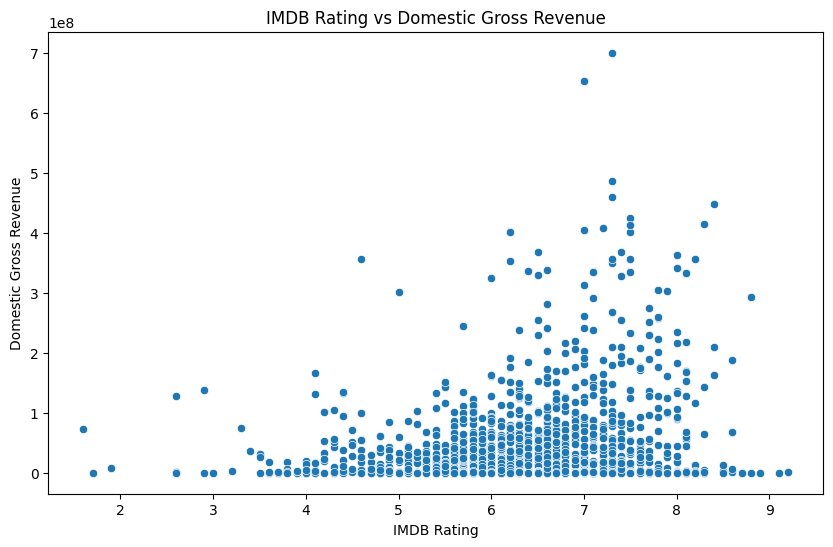

In [87]:
#Ratings Analysis
#Scatter Plot: IMDB Rating vs Domestic Gross Revenue
# Clean and convert averageRating column
imdb_ratings_clean = imdb_data_cleaned['averagerating'].replace('unknown', np.nan).dropna().astype(float)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=imdb_ratings_clean, y=domestic_gross_clean)
plt.title('IMDB Rating vs Domestic Gross Revenue')
plt.xlabel('IMDB Rating')
plt.ylabel('Domestic Gross Revenue')
plt.show()


**Correlation Analysis:**

Identify correlations between different variables in our dataset and visualizing the correlation

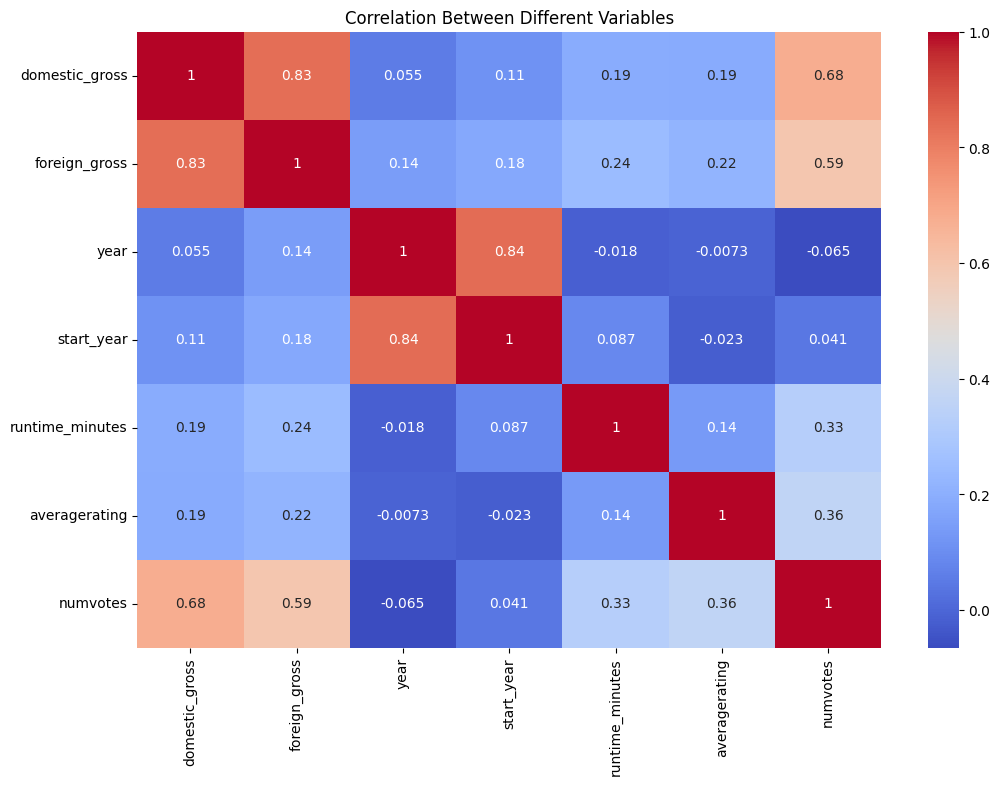

In [112]:
# Select numeric columns
numeric_data = imdb_data_cleaned.select_dtypes(include=['number'])

# Replace 'unknown' and convert to float
numeric_data = numeric_data.replace('unknown', 0)

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Different Variables')
plt.show()


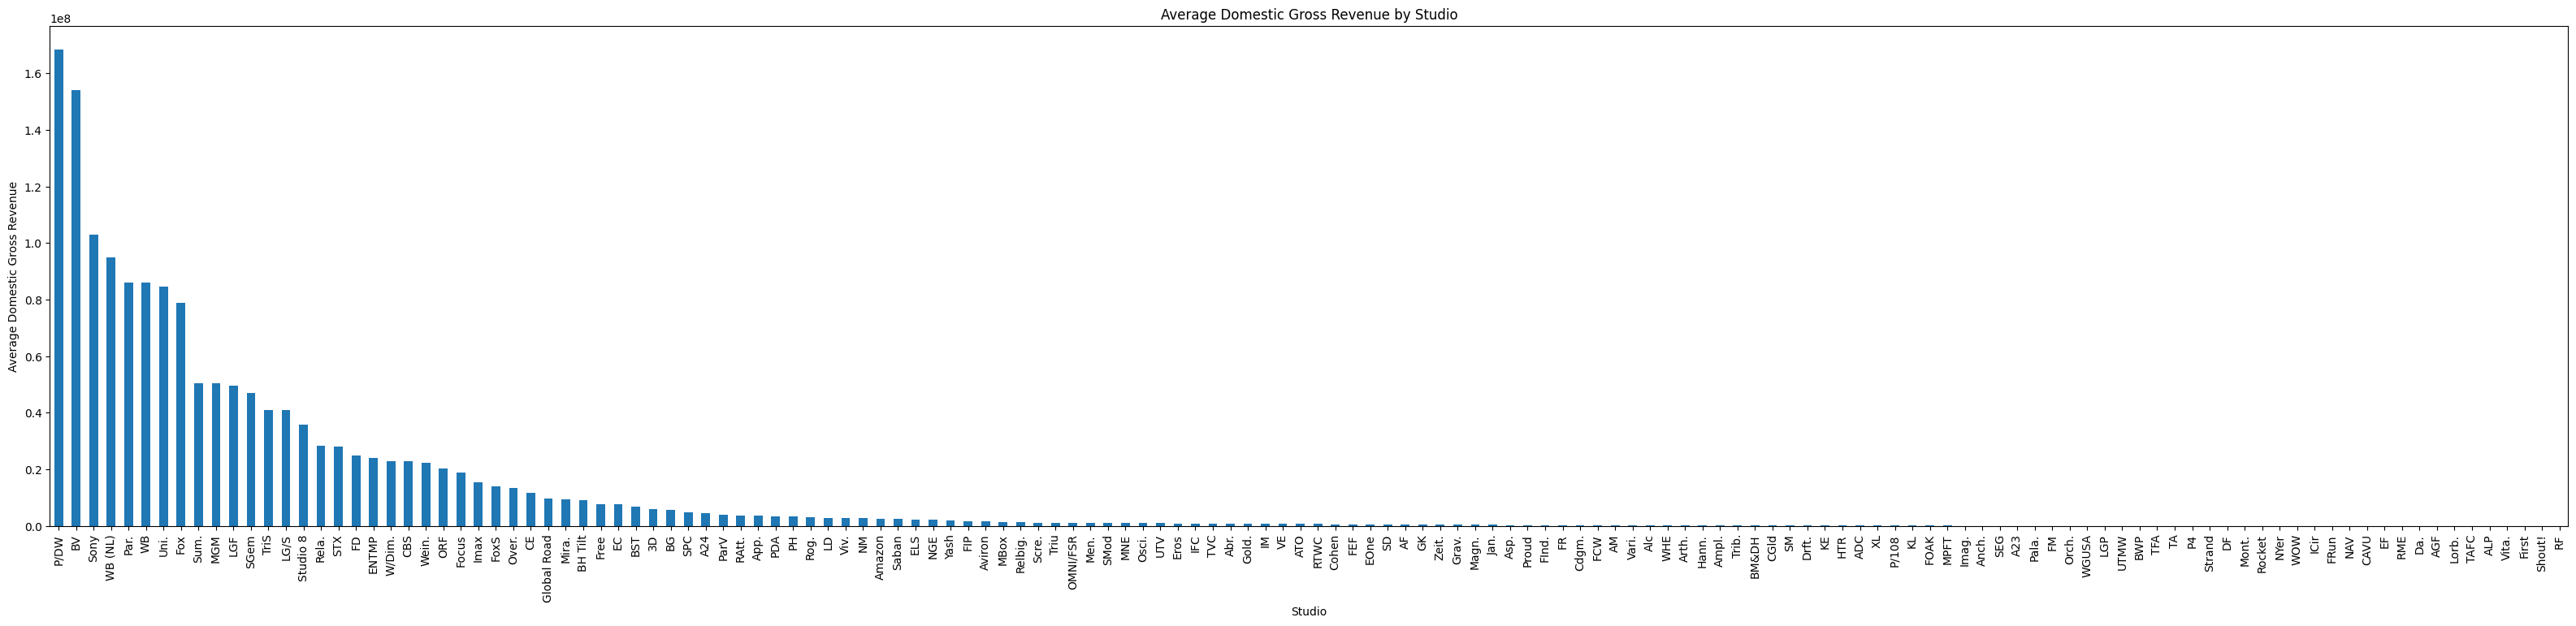

In [114]:
# Segmentation Analysis - Average domestic gross revenue by studio
studio_gross = imdb_data_cleaned.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False)
plt.figure(figsize=(40, 8))
studio_gross.plot(kind='bar')
plt.title('Average Domestic Gross Revenue by Studio')
plt.xlabel('Studio')
plt.ylabel('Average Domestic Gross Revenue')
plt.show()

 Feature Engineering: Profit Margin

Adding the profit margin to help with future data analysis of the data or similar data. It is calculated by the function 

Profit Margin= Gross (Revenue−Production Budget)/Gross Revenue


In [120]:
#Adding a profit margin function to help with future analysis
imdb_data_cleaned['total_gross'] = imdb_data_cleaned['domestic_gross'] + imdb_data_cleaned['foreign_gross']
profit_margin = (imdb_data_cleaned['total_gross'] / imdb_data_cleaned['domestic_gross']) * 100
imdb_data_cleaned['profit_margin'] = profit_margin
profit_margin.head()

0    257.108434
1    283.082707
2    315.291160
3    232.445923
4    199.711908
dtype: float64

**Identifying Trends And Patterns

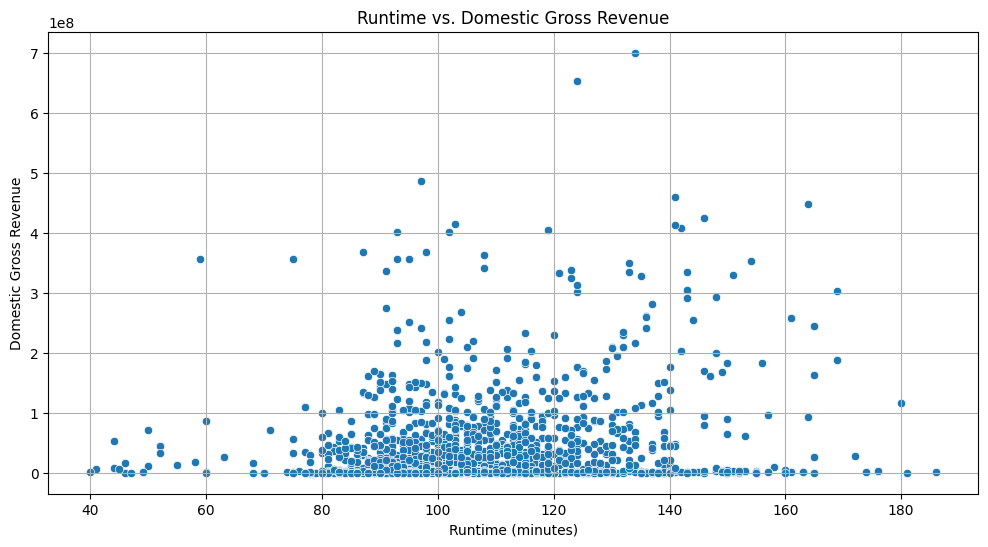

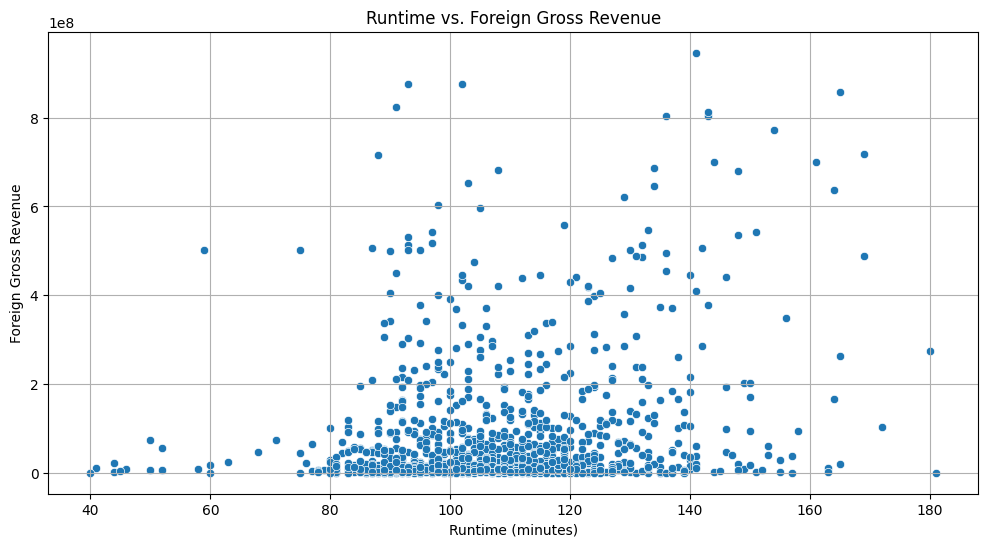

In [133]:
#Trend between runtime and domestic and foreign gross variables
# Scatter plot of runtime vs. domestic gross
plt.figure(figsize=(12, 6))
sns.scatterplot(x='runtime_minutes', y='domestic_gross', data=imdb_data_cleaned)
plt.title('Runtime vs. Domestic Gross Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Domestic Gross Revenue')
plt.grid(True)
plt.show()

# Scatter plot of runtime vs. foreign gross
plt.figure(figsize=(12, 6))
sns.scatterplot(x='runtime_minutes', y='foreign_gross', data=imdb_data_cleaned)
plt.title('Runtime vs. Foreign Gross Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Foreign Gross Revenue')
plt.grid(True)
plt.show()


In [134]:
# Top 10 movies by domestic gross
top_domestic_gross = imdb_data_cleaned[['original_title', 'domestic_gross']].sort_values(by='domestic_gross', ascending=False).head(10)

# Top 10 movies by profit margin
top_profit_margin = imdb_data_cleaned[['original_title', 'profit_margin']].sort_values(by='profit_margin', ascending=False).head(10)

print("Top 10 Movies by Domestic Gross:")
print(top_domestic_gross)

print("\nTop 10 Movies by Profit Margin:")
print(top_profit_margin)


Top 10 Movies by Domestic Gross:
                       original_title  domestic_gross
1614                    Black Panther     700100000.0
1213                   Jurassic World     652300000.0
1406                     Finding Dory     486300000.0
1214          Avengers: Age of Ultron     459000000.0
471             The Dark Knight Rises     448100000.0
747   The Hunger Games: Catching Fire     424700000.0
0                         Toy Story 3     415000000.0
1534                     Wonder Woman     412600000.0
476                  The Hunger Games     408000000.0
1532   Jumanji: Welcome to the Jungle     404500000.0

Top 10 Movies by Profit Margin:
                 original_title  profit_margin
844                      Khumba   2.720100e+06
1011        Journey to the West   1.136012e+06
1581  Amityville: The Awakening   1.100100e+06
531      The Inbetweeners Movie   2.445444e+05
1299                Love, Rosie   1.255902e+05
1652            I Still See You   1.072429e+05
383        

**Conclusion

Through the exploratory data analysis of movie datasets, we have gained insights into various aspects of movie performance, including domestic and foreign gross revenues, runtime, ratings, and profit margins. Here are the key findings:

Data Distribution: The distribution of domestic and foreign gross revenues shows significant variation, with some movies achieving exceptionally high revenues. The runtime analysis indicates that there is a diverse range of movie lengths, but no strong correlation with revenue.

Genre Analysis: Different genres exhibit varying average profit margins. Genres such as [Adventure] and [sci-fi] have shown higher average profit margins compared to others. This suggests that certain genres are more profitable than others.

Correlation Analysis: The correlation analysis reveals that factors such as [sci-fi] and [Thriller] have significant impacts on movie profitability. Understanding these relationships helps in identifying key success factors for profitaable movies.

Trends and Patterns: The analysis of trends and patterns in genres and profit margins highlights that [Runtime/domestic Gross Revenue] is prevalent. This pattern indicates that [Runtime/Foreign Gross Revenue] uncommon.

**Recommendations

Invest in High-Profit Genres: Focus on genres with higher average profit margins[sci-fi].

Tailor Movie Lengths: Produce a variety of movie lengths to meet audience preferences.

Track Industry Trends: Stay updated on trends to adapt and stay competitive.